Contributors: Tom Huang, Sasha Gozan-Keck, Maggie Kuo, Shu Rong Lin

# ***INTRODUCTION***

### Our imagined position on this dataset. Who has hired us, what are the overall goals?

We have been hired by the mayor of New York City to assess ways to decrease or, ideally, end racial disparities that occur during stop-and-frisk searches. Current data shows a vast majority of stop-and-frisk searches are disproportionately towards Black Americans Although stop-and-frisk searches were implemented for public safety, since 2003, there has been a rising trend where more stops have been made every year since. These unlawful stops have been targeted towards innocent indivduals. This highlights the corruption within NYPD and the administration when assessing civilians for danger.

Therefore, the overall goal of assessing this dataset is to show the mayor that corruption within the NYPD needs to be addressed, and to create stricter policies or programs within NYPD to educate current and future law enforcement
on proper danger assesstment.


### Origin of the dataset


Police officers in NYC are supposed to fill out a form recording the details of their stop. Before 2017, the forms were filled out manually but have since changed to electronic. These forms are then entered into the NYPD database. The stop-and-frisk data that NYPD reports occur in two ways: a quarterly summary report and a complete database annually released to the public.

The quarterly reports are released by the NYCLU every three months which includes data on stops, arrests, and summonses. It gets further broken down by precinct of stop, and the race and gender of the person stopped.

The annual database includes nearly all the data recorded by the police officer after a stop (like age, if the person was frisked, weapon or firearm recovered, if physical force was used, and exact loaction of the stop within the precinct). This data is uploaded to the NYPD database, then to their website anually.

# Importing relevant libraries for the project

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import geopandas as gpd
from shapely.geometry import Point, Polygon
import pyproj
import folium
from shapely.geometry import box
%matplotlib inline

# Reading the data

In [2]:
frisk=pd.read_csv("2023_nypd_stop_and_frisk_data.csv")
frisk

<ipython-input-2-5231a9d3726f>:1: DtypeWarning: Columns (78,79) have mixed types. Specify dtype option on import or set low_memory=False.
  frisk=pd.read_csv("2023_nypd_stop_and_frisk_data.csv")


STOP_ID STOP_FRISK_DATE STOP_FRISK_TIME  YEAR2    MONTH2    DAY2  \
0            1      2023-01-01        00:44:00   2023   January  Sunday   
1            2      2023-01-01        00:49:00   2023   January  Sunday   
2            3      2023-01-01        05:31:00   2023   January  Sunday   
3            4      2023-01-01        04:59:00   2023   January  Sunday   
4            5      2023-01-01        05:21:00   2023   January  Sunday   
...        ...             ...             ...    ...       ...     ...   
16966    16967      2023-12-31        07:10:00   2023  December  Sunday   
16967    16968      2023-12-31        07:10:00   2023  December  Sunday   
16968    16969      2023-12-31        07:10:00   2023  December  Sunday   
16969    16970      2023-12-31        00:42:00   2023  December  Sunday   
16970    16971      2023-12-31        21:44:00   2023  December  Sunday   

            STOP_WAS_INITIATED RECORD_STATUS_CODE ISSUING_OFFICER_RANK  \
0           Based on Radio Run                APP                  POM   
1      Based on Self Initiated                APP                  POM   
2           Based on Radio Run                APP                  POM   
3      Based on Self Initiated                APP                  POM   
4      Based on Self Initiated                APP                  POF   
...                        ...                ...                  ...   
16966    Based on C/W on Scene                APP                   PO   
16967    Based on C/W on Scene                APP                   PO   
16968    Based on C/W on Scene                APP                   PO   
16969    Based on C/W on Scene                APP                   PO   
16970       Based on Radio Run                APP                   PO   

       ISSUING_OFFICER_COMMAND_CODE  ...  \
0                               804  ...   
1                                69  ...   
2                                83  ...   
3                               113  ...   
4                                46  ...   
...                             ...  ...   
16966                           114  ...   
16967                           114  ...   
16968                           114  ...   
16969                           104  ...   
16970                            81  ...   

                               SUSPECT_OTHER_DESCRIPTION  \
0                                 BLUE HOODIE BLUE JEANS   
1                                                    UNK   
2                                                    NaN   
3                                                 (null)   
4                                                 (null)   
...                                                  ...   
16966  BLACK JACKET BLACK SNEAKERS BROWN PANTS BLACK ...   
16967  BLACK BEANIE HAT BLACK COAT BLACK PANTS BROWN ...   
16968  BLACK COAT GREY PANTS WHITE NIKE SNEAKERS WITH...   
16969                           BLACK JACKET/ BLUE JEANS   
16970                                             (null)   

       STOP_LOCATION_PRECINCT STOP_LOCATION_SECTOR_CODE  \
0                           5                         A   
1                          69                         B   
2                          83                         D   
3                         113                         B   
4                          46                         B   
...                       ...                       ...   
16966                     114                         D   
16967                     114                         D   
16968                     114                         D   
16969                     104                         C   
16970                      81                         A   

      STOP_LOCATION_APARTMENT      STOP_LOCATION_FULL_ADDRESS  \
0                          3B                   46 MADISON ST   
1                      (null)                9910 SEAVIEW AVE   
2                      (null)  TROUTMAN ST && ST NICHOLAS AVE  

# Data Cleaning

In [3]:
frisk.isnull().values.any()

True

In [4]:
frisk=frisk.dropna()

## Keeping the relevant columns for analysis

In [5]:
frisk=frisk[["SUSPECTED_CRIME_DESCRIPTION", "OFFICER_EXPLAINED_STOP_FLAG", "SUPERVISING_ACTION_CORRESPONDING_ACTIVITY_LOG_ENTRY_REVIEWED", "SUSPECT_ARRESTED_FLAG", "SUSPECT_ARREST_OFFENSE", "OFFICER_IN_UNIFORM_FLAG",
             "FRISKED_FLAG", "SEARCHED_FLAG","ASK_FOR_CONSENT_FLG", "CONSENT_GIVEN_FLG", "PHYSICAL_FORCE_VERBAL_INSTRUCTION_FLAG", "SUSPECT_REPORTED_AGE",
             "SUSPECT_SEX", "SUSPECT_RACE_DESCRIPTION", "STOP_LOCATION_PRECINCT", "STOP_LOCATION_X", "STOP_LOCATION_Y", "STOP_LOCATION_BORO_NAME"]]
frisk

SUSPECTED_CRIME_DESCRIPTION OFFICER_EXPLAINED_STOP_FLAG  \
0                        MENACING                           Y   
1                             CPW                           N   
3                             CPW                           Y   
4                             CPW                           N   
7                        MENACING                           Y   
...                           ...                         ...   
16966                    BURGLARY                           Y   
16967                    BURGLARY                           Y   
16968                    BURGLARY                           Y   
16969                    MENACING                           Y   
16970                         CPW                           Y   

      SUPERVISING_ACTION_CORRESPONDING_ACTIVITY_LOG_ENTRY_REVIEWED  \
0                                                      Y             
1                                                      Y             
3                                                      Y             
4                                                      N             
7                                                      Y             
...                                                  ...             
16966                                                  N             
16967                                                  N             
16968                                                  N             
16969                                                  N             
16970                                                  N             

      SUSPECT_ARRESTED_FLAG SUSPECT_ARREST_OFFENSE OFFICER_IN_UNIFORM_FLAG  \
0                         N                 (null)                       Y   
1                         Y                    CPW                       Y   
3                         N                 (null)                       Y   
4                         Y                    CPW                       Y   
7                         N                 (null)                       Y   
...                     ...                    ...                     ...   
16966                     Y      CRIMINAL TRESPASS                       Y   
16967                     Y      CRIMINAL TRESPASS                       Y   
16968                     Y      CRIMINAL TRESPASS                       Y   
16969                     Y               MENACING                       Y   
16970                     N                 (null)                       Y   

      FRISKED_FLAG SEARCHED_FLAG ASK_FOR_CONSENT_FLG CONSENT_GIVEN_FLG  \
0                Y             N                   N                 N   
1                Y             Y                   N                 N   
3                Y             Y                   N                 Y   
4                Y             Y                   N                 N   
7                N             N                   Y                 Y   
...            ...           ...                 ...               ...   
16966            Y             Y                   N                 N   
16967            Y             Y                   N                 N   
16968            Y             Y                   N                 N   
16969            Y             Y                   N                 N   
16970            Y             N                   N            (null)   

      PHYSICAL_FORCE_VERBAL_INSTRUCTION_FLAG SUSPECT_REPORTED_AGE SUSPECT_SEX  \
0                                          Y                   32        MALE   
1                                          Y                   23        MALE   
3                                          Y                   20        MALE   
4                                          Y                   25        MALE   
7                                          Y                   41        MALE   
...                                      ...                  ...       

## Replacing nulls to NA to clean the new dataframe

In [6]:
frisk.replace("(null)", pd.NA, inplace=True)
frisk1=frisk.dropna()
frisk1

SUSPECTED_CRIME_DESCRIPTION OFFICER_EXPLAINED_STOP_FLAG  \
1                             CPW                           N   
4                             CPW                           N   
9                             CPW                           Y   
12                            CPW                           Y   
13                        ROBBERY                           Y   
...                           ...                         ...   
16956                     ASSAULT                           Y   
16960                         CPW                           Y   
16966                    BURGLARY                           Y   
16967                    BURGLARY                           Y   
16968                    BURGLARY                           Y   

      SUPERVISING_ACTION_CORRESPONDING_ACTIVITY_LOG_ENTRY_REVIEWED  \
1                                                      Y             
4                                                      N             
9                                                      Y             
12                                                     N             
13                                                     Y             
...                                                  ...             
16956                                                  N             
16960                                                  Y             
16966                                                  N             
16967                                                  N             
16968                                                  N             

      SUSPECT_ARRESTED_FLAG SUSPECT_ARREST_OFFENSE OFFICER_IN_UNIFORM_FLAG  \
1                         Y                    CPW                       Y   
4                         Y                    CPW                       Y   
9                         Y                    CPW                       Y   
12                        Y                ASSAULT                       Y   
13                        Y                  OTHER                       Y   
...                     ...                    ...                     ...   
16956                     Y                ASSAULT                       Y   
16960                     Y                    CPW                       Y   
16966                     Y      CRIMINAL TRESPASS                       Y   
16967                     Y      CRIMINAL TRESPASS                       Y   
16968                     Y      CRIMINAL TRESPASS                       Y   

      FRISKED_FLAG SEARCHED_FLAG ASK_FOR_CONSENT_FLG CONSENT_GIVEN_FLG  \
1                Y             Y                   N                 N   
4                Y             Y                   N                 N   
9                Y             Y                   N                 N   
12               Y             Y                   Y                 Y   
13               Y             N                   N                 N   
...            ...           ...                 ...               ...   
16956            Y             N                   N                 N   
16960            Y             Y                   Y                 Y   
16966            Y             Y                   N                 N   
16967            Y             Y                   N                 N   
16968            Y             Y                   N                 N   

      PHYSICAL_FORCE_VERBAL_INSTRUCTION_FLAG SUSPECT_REPORTED_AGE SUSPECT_SEX  \
1                                          Y                   23        MALE   
4                                          Y                   25        MALE   
9                                          Y                   65        MALE   
12                                         Y                   27        MALE   
13                                         Y                   26        MALE   
...                                      ...                  ...       

### Explanation of the remaining columns



- SUSPECTED_CRIME_DESCRIPTION (Text): The crime the suspect was suspected of committing

- SUPERVISING_ACTION_CORRESPONDING_ACTIVITY_LOG_ENTRY_REVIEWED (Categorical):  Indicates if a log entry was reviewed by a supervisor

- OFFICER_EXPLAINED_STOP_FLAG (Categorical): Indicates if the officer explained the reason for the stop to the suspect

- SUSPECT_ARRESTED_FLAG (Categorical): Indicates if the suspect was arrested

- SUSPECT_ARREST_OFFENSE (Text): Description of the offense for which the suspect was arrested

- OFFICER_IN_UNIFORM_FLAG (Categorical):  Indicates if the officer was in uniform during the stop

- FRISKED_FLAG (Categorical): Indicates if the suspect was frisked

- SEARCHED_FLAG (Categorical): Indicates if the suspect was searched

- ASK_FOR_CONSENT_FLAG (Categorical): Indicates if the officer asked for the suspect’s consent to search

- CONSENT_GIVEN_FLAG (Categorical):Indicates if the suspect gave consent for the search

- PHYSICAL_FORCE_VERBAL_INSTRUCTION_FLAG (Categorical):  Indicates if verbal instructions were used as force

- SUSPECT_REPORTED_AGE (Numeric): The reported age of the suspect

- SUSPECT_SEX (Categorical): The reported sex of the suspect

- SUSPECT_RACE_DESCRIPTION (Categorical): The reported race of the suspect

- STOP_LOCATION_PRECINCT (Numeric): The precinct where the stop occurred

- STOP_LOCATION_X (Numeric): X-coordinate of the location the stop occurred
- STOP_LOCATION_Y (Numeric): Y-coordinate of the location the stop occurred

- STOP_LOCATION_BORO_NAME (Categorical): Boroughs in New York where stops occurred



# ***Data + Analysis***

### Research Questions:

1. How accurately can we predict if someone will be stopped and frisked by the NYPD based on demographic information based on age, sex, and race? (regression)

2. Which boroughs in New York City have higher rates of stop and frisk, in terms of precinct stop locations? (mapping)

3. Out of the reported stop and frisks, what fraction of NYPD officers asked the suspect for consent? Within the two kinds of cases, how many led to unnecessary physical escalation? (data visualization)

4. Is there a relationship between whether or not a supervisor checked the logs and if an arrest occured? (regression)

In [7]:
#1 How accurately can we predict if someone will be stopped and frisked by the NYPD based on demographic information based on age, sex, and race? (Sasha Gozan-Keck)

## Logistical Regression Analysis

### Focusing on race and sex

In [8]:
X = frisk[["SUSPECT_SEX", "SUSPECT_RACE_DESCRIPTION"]]
X = pd.get_dummies(X, drop_first = True).astype("float32")
X.head()

SUSPECT_SEX_MALE  SUSPECT_RACE_DESCRIPTION_ASIAN / PACIFIC ISLANDER  \
0               1.0                                                0.0   
1               1.0                                                0.0   
3               1.0                                                0.0   
4               1.0                                                0.0   
7               1.0                                                0.0   

   SUSPECT_RACE_DESCRIPTION_BLACK  SUSPECT_RACE_DESCRIPTION_BLACK HISPANIC  \
0                             1.0                                      0.0   
1                             0.0                                      0.0   
3                             1.0                                      0.0   
4                             0.0                                      1.0   
7                             1.0                                      0.0   

   SUSPECT_RACE_DESCRIPTION_MIDDLE EASTERN/SOUTHWEST ASIAN  \
0                                                0.0         
1                                                0.0         
3                                                0.0         
4                                                0.0         
7                                                0.0         

   SUSPECT_RACE_DESCRIPTION_WHITE  SUSPECT_RACE_DESCRIPTION_WHITE HISPANIC  
0                             0.0                                      0.0  
1                             0.0                                      1.0  
3                             0.0                                      0.0  
4                             0.0                                      0.0  
7                             0.0                                      0.0

### Converting boolean to float32

In [9]:
y = (frisk["FRISKED_FLAG"] == "Y").astype("float32")
y.value_counts()

FRISKED_FLAG
1.0    8826
0.0    4870
Name: count, dtype: int64

### Regression output

In [10]:
X = sm.tools.tools.add_constant(X)

model = sm.Logit(y, X).fit()

print(model.summary())

Optimization terminated successfully.
         Current function value: 0.621522
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           FRISKED_FLAG   No. Observations:                13696
Model:                          Logit   Df Residuals:                    13688
Method:                           MLE   Df Model:                            7
Date:                Fri, 20 Dec 2024   Pseudo R-squ.:                 0.04503
Time:                        04:58:55   Log-Likelihood:                -8512.4
converged:                       True   LL-Null:                       -8913.8
Covariance Type:            nonrobust   LLR p-value:                4.496e-169
                                                              coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------
const             

In [11]:
model.pred_table(threshold=0.5)

array([[1077., 3793.],
       [ 555., 8271.]])

In [12]:
confusion = model.pred_table(threshold=0.5)

confusion.trace()/confusion.sum()*100

68.2535046728972

In [13]:
y.value_counts(normalize=True)

FRISKED_FLAG
1.0    0.644422
0.0    0.355578
Name: proportion, dtype: float64

The regression shows statistically significant effects of both sex and race on whether someone will be frisked. Being male makes it more likely that someone will be frisked. Race is more confusing to look at, since all races have negative coefficients. However, you can see that white people have a much lower coefficient (-2.75) than Black people (-1.4), meaning white people are less likely to be frisked than Black people.

It's also important to point out that the model's accuracy (68.25%) is only slightly higher than the null accuracy (64.44%), so results should be taken with a grain of salt. It seems that, while race and sex do influence if someone will be stopped and frisked, there are many other factors at play as well.

In [14]:
#2 Which boroughs in New York City have higher rates of stop and frisk, in terms of precinct stop locations? (Maggie Kuo)

### Convert Frisk dataframe into GeoPandas

In [15]:
frisk1=gpd.read_file("2023_nypd_stop_and_frisk_data.csv")

### Load in a NYC borough map for layering

In [16]:
borough=gpd.read_file("Borough Boundaries.zip")
borough

boro_code      boro_name    shape_area     shape_leng  \
0        3.0       Brooklyn  1.934143e+09  728147.130565   
1        5.0  Staten Island  1.623619e+09  325910.306061   
2        1.0      Manhattan  6.366461e+08  360037.525777   
3        2.0          Bronx  1.187175e+09  463180.578878   
4        4.0         Queens  3.041418e+09  888197.010944   

                                            geometry  
0  MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ...  
1  MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ...  
2  MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ...  
3  MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ...  
4  MULTIPOLYGON (((-73.82645 40.59053, -73.82642 ...

### Clean data of NAs

In [17]:
frisk.replace("(null)", pd.NA, inplace=True)
frisk1=frisk.dropna()
frisk1

SUSPECTED_CRIME_DESCRIPTION OFFICER_EXPLAINED_STOP_FLAG  \
1                             CPW                           N   
4                             CPW                           N   
9                             CPW                           Y   
12                            CPW                           Y   
13                        ROBBERY                           Y   
...                           ...                         ...   
16956                     ASSAULT                           Y   
16960                         CPW                           Y   
16966                    BURGLARY                           Y   
16967                    BURGLARY                           Y   
16968                    BURGLARY                           Y   

      SUPERVISING_ACTION_CORRESPONDING_ACTIVITY_LOG_ENTRY_REVIEWED  \
1                                                      Y             
4                                                      N             
9                                                      Y             
12                                                     N             
13                                                     Y             
...                                                  ...             
16956                                                  N             
16960                                                  Y             
16966                                                  N             
16967                                                  N             
16968                                                  N             

      SUSPECT_ARRESTED_FLAG SUSPECT_ARREST_OFFENSE OFFICER_IN_UNIFORM_FLAG  \
1                         Y                    CPW                       Y   
4                         Y                    CPW                       Y   
9                         Y                    CPW                       Y   
12                        Y                ASSAULT                       Y   
13                        Y                  OTHER                       Y   
...                     ...                    ...                     ...   
16956                     Y                ASSAULT                       Y   
16960                     Y                    CPW                       Y   
16966                     Y      CRIMINAL TRESPASS                       Y   
16967                     Y      CRIMINAL TRESPASS                       Y   
16968                     Y      CRIMINAL TRESPASS                       Y   

      FRISKED_FLAG SEARCHED_FLAG ASK_FOR_CONSENT_FLG CONSENT_GIVEN_FLG  \
1                Y             Y                   N                 N   
4                Y             Y                   N                 N   
9                Y             Y                   N                 N   
12               Y             Y                   Y                 Y   
13               Y             N                   N                 N   
...            ...           ...                 ...               ...   
16956            Y             N                   N                 N   
16960            Y             Y                   Y                 Y   
16966            Y             Y                   N                 N   
16967            Y             Y                   N                 N   
16968            Y             Y                   N                 N   

      PHYSICAL_FORCE_VERBAL_INSTRUCTION_FLAG SUSPECT_REPORTED_AGE SUSPECT_SEX  \
1                                          Y                   23        MALE   
4                                          Y                   25        MALE   
9                                          Y                   65        MALE   
12                                         Y                   27        MALE   
13                                         Y                   26        MALE   
...                                      ...                  ...       

### Converting longitude coordinates to numeric values

Before doing this, the frisk data could not read the longitude coordinates because invalid values. "Coerce" converted these invalid values to NANs.

In [18]:
frisk1['STOP_LOCATION_X'] = pd.to_numeric(frisk1['STOP_LOCATION_X'], errors='coerce')

<ipython-input-18-fd76de43cb79>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frisk1['STOP_LOCATION_X'] = pd.to_numeric(frisk1['STOP_LOCATION_X'], errors='coerce')


### Now GeoPandas can read the Frisk data because of the geomtery points (from the longtitude and latitude)

In [19]:
frisk_gdf = gpd.GeoDataFrame(frisk1, geometry=gpd.points_from_xy(frisk1.STOP_LOCATION_Y, frisk1.STOP_LOCATION_X))
frisk_gdf.head(3)

SUSPECTED_CRIME_DESCRIPTION OFFICER_EXPLAINED_STOP_FLAG  \
1                         CPW                           N   
4                         CPW                           N   
9                         CPW                           Y   

  SUPERVISING_ACTION_CORRESPONDING_ACTIVITY_LOG_ENTRY_REVIEWED  \
1                                                  Y             
4                                                  N             
9                                                  Y             

  SUSPECT_ARRESTED_FLAG SUSPECT_ARREST_OFFENSE OFFICER_IN_UNIFORM_FLAG  \
1                     Y                    CPW                       Y   
4                     Y                    CPW                       Y   
9                     Y                    CPW                       Y   

  FRISKED_FLAG SEARCHED_FLAG ASK_FOR_CONSENT_FLG CONSENT_GIVEN_FLG  \
1            Y             Y                   N                 N   
4            Y             Y                   N                 N   
9            Y             Y                   N                 N   

  PHYSICAL_FORCE_VERBAL_INSTRUCTION_FLAG SUSPECT_REPORTED_AGE SUSPECT_SEX  \
1                                      Y                   23        MALE   
4                                      Y                   25        MALE   
9                                      Y                   65        MALE   

  SUSPECT_RACE_DESCRIPTION  STOP_LOCATION_PRECINCT  STOP_LOCATION_X  \
1           WHITE HISPANIC                      69          1015557   
4           BLACK HISPANIC                      46          1013821   
9                    BLACK                      20           989173   

  STOP_LOCATION_Y STOP_LOCATION_BORO_NAME                geometry  
1          170379                BROOKLYN  POINT (170379 1015557)  
4          252710                   BRONX  POINT (252710 1013821)  
9          221221               MANHATTAN   POINT (221221 989173)

### Plotting the borough map

<Axes: >

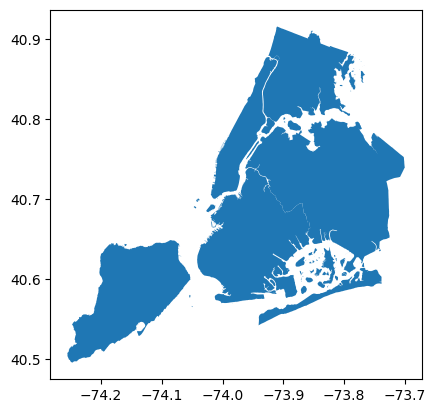

In [20]:
borough=gpd.read_file("Borough Boundaries.zip")
borough.plot()

### Checking the CRS of the borough map

In [21]:
borough.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

### Setting the CRS of the frisk data to be the same as the borough data

In [22]:
frisk_gdf.set_crs(epsg=4326,inplace=True)

SUSPECTED_CRIME_DESCRIPTION OFFICER_EXPLAINED_STOP_FLAG  \
1                             CPW                           N   
4                             CPW                           N   
9                             CPW                           Y   
12                            CPW                           Y   
13                        ROBBERY                           Y   
...                           ...                         ...   
16956                     ASSAULT                           Y   
16960                         CPW                           Y   
16966                    BURGLARY                           Y   
16967                    BURGLARY                           Y   
16968                    BURGLARY                           Y   

      SUPERVISING_ACTION_CORRESPONDING_ACTIVITY_LOG_ENTRY_REVIEWED  \
1                                                      Y             
4                                                      N             
9                                                      Y             
12                                                     N             
13                                                     Y             
...                                                  ...             
16956                                                  N             
16960                                                  Y             
16966                                                  N             
16967                                                  N             
16968                                                  N             

      SUSPECT_ARRESTED_FLAG SUSPECT_ARREST_OFFENSE OFFICER_IN_UNIFORM_FLAG  \
1                         Y                    CPW                       Y   
4                         Y                    CPW                       Y   
9                         Y                    CPW                       Y   
12                        Y                ASSAULT                       Y   
13                        Y                  OTHER                       Y   
...                     ...                    ...                     ...   
16956                     Y                ASSAULT                       Y   
16960                     Y                    CPW                       Y   
16966                     Y      CRIMINAL TRESPASS                       Y   
16967                     Y      CRIMINAL TRESPASS                       Y   
16968                     Y      CRIMINAL TRESPASS                       Y   

      FRISKED_FLAG SEARCHED_FLAG ASK_FOR_CONSENT_FLG CONSENT_GIVEN_FLG  \
1                Y             Y                   N                 N   
4                Y             Y                   N                 N   
9                Y             Y                   N                 N   
12               Y             Y                   Y                 Y   
13               Y             N                   N                 N   
...            ...           ...                 ...               ...   
16956            Y             N                   N                 N   
16960            Y             Y                   Y                 Y   
16966            Y             Y                   N                 N   
16967            Y             Y                   N                 N   
16968            Y             Y                   N                 N   

      PHYSICAL_FORCE_VERBAL_INSTRUCTION_FLAG SUSPECT_REPORTED_AGE SUSPECT_SEX  \
1                                          Y                   23        MALE   
4                                          Y                   25        MALE   
9                                          Y                   65        MALE   
12                                         Y                   27        MALE   
13                                         Y                   26        MALE   
...                                      ...                  ...       

### Checking the CRS of the frisk data

In [23]:
frisk_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

### Creating a new data table

Based on the research question, I needed to count the number of precincts in each borough because a stop-and-frisk gets reported to the nearest precinct location. By counting the number of precincts, I could then find the borough with the highest number of stop-and frisks.

The reason for creating a new data table is because I needed to merge the new table (stops_by_borough) with the borough map data. This allows me to directly plot the borough map with precinct data.

In [24]:
stops_by_borough=frisk.groupby("STOP_LOCATION_BORO_NAME")[["STOP_LOCATION_PRECINCT"]].count().reset_index()
stops_by_borough.columns=["boro_name", "stop_count"]
stops_by_borough

boro_name  stop_count
0          BRONX        5114
1       BROOKLYN        3365
2      MANHATTAN        2708
3         QUEENS        2070
4  STATEN ISLAND         439

### Converting both dataframes to be lower case

I encountered an error where the merge could not happen, and discovered the datasets are case sensitive. Therefore, I made both the data sets have lowercase letters.

In [25]:
borough['boro_name'] = borough['boro_name'].str.strip().str.upper()
stops_by_borough['boro_name'] = stops_by_borough['boro_name'].str.strip().str.upper()

### Merging the data sets

In [26]:
borough_stops=borough.merge(stops_by_borough, on="boro_name", how="left")
borough_stops

boro_code      boro_name    shape_area     shape_leng  \
0        3.0       BROOKLYN  1.934143e+09  728147.130565   
1        5.0  STATEN ISLAND  1.623619e+09  325910.306061   
2        1.0      MANHATTAN  6.366461e+08  360037.525777   
3        2.0          BRONX  1.187175e+09  463180.578878   
4        4.0         QUEENS  3.041418e+09  888197.010944   

                                            geometry  stop_count  
0  MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ...        3365  
1  MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ...         439  
2  MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ...        2708  
3  MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ...        5114  
4  MULTIPOLYGON (((-73.82645 40.59053, -73.82642 ...        2070

### Converting the CRS of the new data to be the CRS of NYC specifically

In [27]:
borough_stops = borough_stops.to_crs(epsg=2263)

### Calculating centroid (center) of each borough's geometry, longitude, and lagitude

In [28]:
borough_stops["centroid"] = borough_stops.geometry.centroid
borough_stops["centroid_x"] = borough_stops.centroid.x
borough_stops["centroid_y"] = borough_stops.centroid.y

### Plotting the data (Data Visualization)

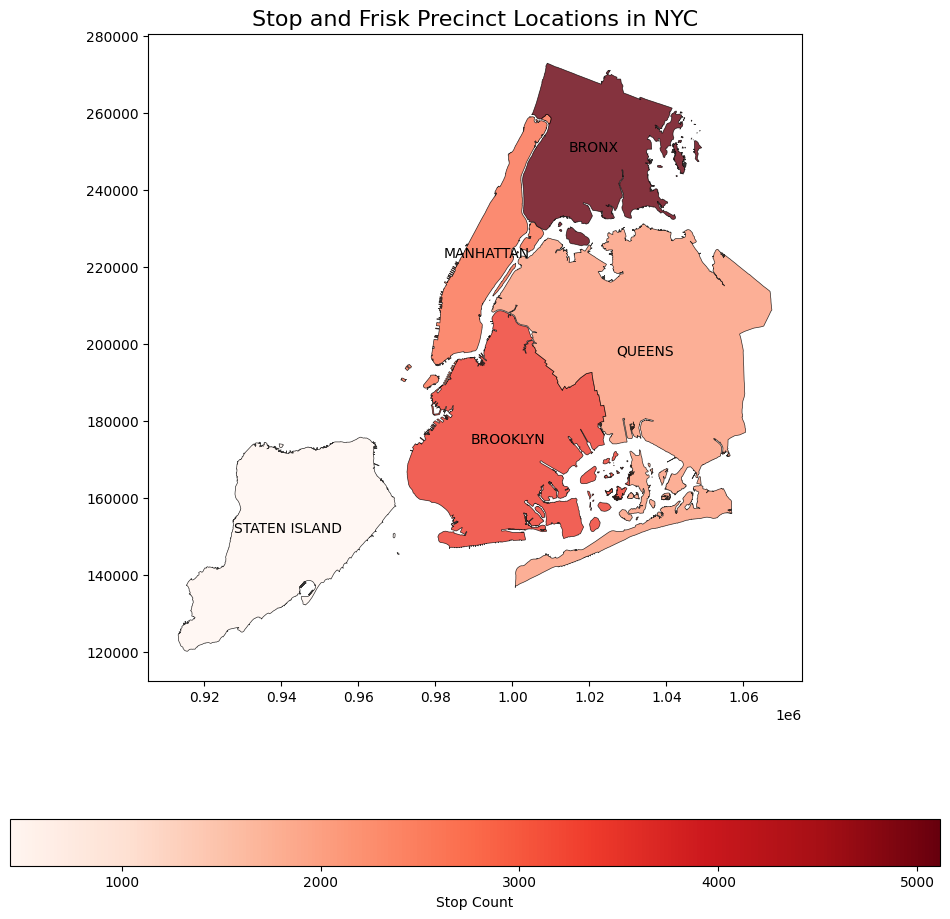

In [29]:
fig, ax = plt.subplots(figsize=(12, 12))
borough_stops.plot(ax=ax, edgecolor='black', alpha=0.8, linewidth=0.5, column="stop_count", cmap="Reds", legend=True, legend_kwds={"orientation": "horizontal", "label": "Stop Count"})

for idx, row in borough_stops.iterrows():
    ax.text(
        row["centroid_x"],
        row["centroid_y"],
        row["boro_name"],
        fontsize=10,
        ha="center",
        color="black")

ax.set_title("Stop and Frisk Precinct Locations in NYC", fontsize=16)

plt.show()

This map shows the number of precincts counted for a stop and frisk nearby within all 5  NYC boroughs. It is apparent the Bronx has around 5,000 stops, visualized with the darkest red on the map. This aligns with the outcome from logistic regression in question 1-- Black males are more likely to be frisked (compared to white males)--because the major demographic in the Bronx is Black Americans. The second highest frisks occured in Brooklyn, which also makes sense as downtown Brooklyn and east Brooklyn (boardering Queens) has a high Black demographic as well. As for Staten Island, this borough has the least amount of frisks likely due to the demographic being majority Italian and Jewish (white Americans).

Unfortunately, the frisk data set's X and Y coordiantes could not be pointed to show specific precinct locations on the map making it less detailed. We can not see the specific locations within the boroughs where higher rates of frisks occur, however we can still have a general understanding of the problems occuring and create future implications from this map.

#### https://www.citypopulation.de/en/usa/newyorkcity/
#### https://www.nyc.gov/assets/dfta/downloads/pdf/reports/Demographics_by_NTA.pdf

In [30]:
#3 Out of the reported stop and frisks, what fraction of NYPD officers asked the suspect for consent? Within the two kinds of cases, how many led to unnecessary physical escalation? (Shu Rong Lin)

### Visualizing physical (verbal) escalation occurring during a frisk even when consent was granted

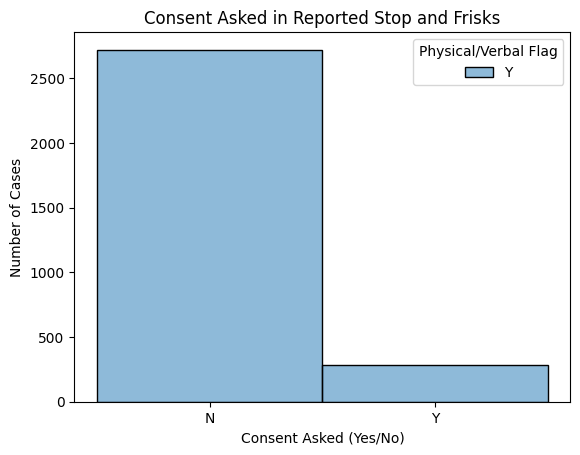

In [31]:
frisk1_renamed = frisk1.rename(columns={"PHYSICAL_FORCE_VERBAL_INSTRUCTION_FLAG": "Physical/Verbal Flag"})
# renamed column so legend could be smaller
sns.histplot(frisk1_renamed, x= "ASK_FOR_CONSENT_FLG" , binwidth=5, hue = "Physical/Verbal Flag")
plt.title("Consent Asked in Reported Stop and Frisks")
plt.xlabel("Consent Asked (Yes/No)")
plt.ylabel("Number of Cases")
plt.show()

In [32]:
total_stops = len(frisk1)
# provides number of reports in cleaned dataset
consent_asked_stops = len(frisk1[frisk1["ASK_FOR_CONSENT_FLG"]=="Y"])
# provides number of cases where the officer did ask for consent
fraction=consent_asked_stops/total_stops
print(fraction)
# fraction = 09357309357309357

0.09357309357309357


In [33]:
len(frisk)
# provides number of reports in original dataset

13696

  Out of the reported stop and frisks, only in about 9.53% of the cases did the officer ask for consent, meaning about 90.47% of the cases were not consented to. Out of the 3587 cases from the cleaned dataset, all of them involved physical or verbal escalation. This data is in reference to the cleaned dataset.

  The cleaned dataset is a version of the original dataset that has any null or NA values removed. The original dataset contained 13696 stop and frisk reports so almost 80% of the original dataset got removed. It is possible that any "N" (No) values under the column for physical/verbal escalation were unreported and therefore replaced with null or NA in the original dataset.

  Hence, looking at the cleaned dataset, it can be concluded that a stop and frisk case has almost a one in ten chance of an officer asking for consent, which is alarming. Regarding whether a general stop and frisk case would involve physical or verbal escalation, no conclusion can be confidently drawn because the cleaned dataset only contains "Y" (Yes) under that specific column, which is suspicious. Therefore, more data is needed to reach a conclusion regarding this part of the research question.

---



In [34]:
#Is there a relationship between whether or not a supervisor checked the logs and if an arrest occured? (Tom Huang)

### Logistical Regression

The indpendent variables include different categorical factors that focus on the action of the police officer. However, we primarily wanted to see if the actions of the supervisor affected an arrest.

In [35]:
X = frisk[["SUPERVISING_ACTION_CORRESPONDING_ACTIVITY_LOG_ENTRY_REVIEWED", "OFFICER_EXPLAINED_STOP_FLAG", "OFFICER_IN_UNIFORM_FLAG", "ASK_FOR_CONSENT_FLG", "CONSENT_GIVEN_FLG"]]
X = pd.get_dummies(X, drop_first = True).astype("float32")

The dependent variable is whether or not the suspect was arrested, and so we focused on "yes" (Y).

In [36]:
y=(frisk["SUSPECT_ARRESTED_FLAG"]=="Y").astype("float32")

### Logistical Regression Output

In [37]:
X = sm.tools.tools.add_constant(X)

model = sm.Logit(y, X).fit()

print(model.summary())

Optimization terminated successfully.
         Current function value: 0.577972
         Iterations 5
                             Logit Regression Results                            
Dep. Variable:     SUSPECT_ARRESTED_FLAG   No. Observations:                13696
Model:                             Logit   Df Residuals:                    13690
Method:                              MLE   Df Model:                            5
Date:                   Fri, 20 Dec 2024   Pseudo R-squ.:                 0.03850
Time:                           04:59:00   Log-Likelihood:                -7915.9
converged:                          True   LL-Null:                       -8232.8
Covariance Type:               nonrobust   LLR p-value:                9.639e-135
                                                                     coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------

In [38]:
model.pred_table(threshold=0.5)

array([[9426.,  314.],
       [3367.,  589.]])

In [39]:
confusion = model.pred_table(threshold=0.5)

confusion.trace()/confusion.sum()*100

73.12353971962617

The results from this logistic regression shows that there is a statistically significant relationship between  whether or not a supervisor checked the logs and if an arrest occurred. There is a positive positive coefficient of 0.1978 and a p-value less than 0.05. This means that when a supervisor checks the logs, there is a higher chance that an arrest occured. However, the model's predictive performance shown through confusion matrix, shows that the model is not perfect and can be improved upon. The model has 9,426 true negatives, 589 true positives, 314 false positives, and 3,367 false negatives. Additonally the classification accuracy of the model is is 73.12%, which is slightly higher than the null accuracy of about 71.1% meaning that the model outperforms the null model. While the model is able to correctly predict outcomes in the majority of cases, the fact that there is such high number of false negatives and false positives indicates that there needs to be improvements made to the model to enhance its predictive power. This also means that although whether a supervisor checked the logs had an impact on arrests made, there are many other factors at play.

Some of these significant factors include whether the officer explained the stop and whether consent for the frisk was given. When the officer did explain the stop there is a negative coefficient of -1.6142 and a significant p value of less than 0.000. When consent was given for a frisk, the coefficent was -0.3165 and the p-value was 0.000. For both of these columns, if the officer explained the stop or if consent for a frisk was given, the odds of an arrest happening are reduced.

# ***Conclusion***

After analyzing the 2023 stop and frisk data provided by NYCLU, the data proved to have many nulls and NAs values preventing a deeper analysis. This possibly occurred because officers did not report on the necessary information they should have, or an error in NYPD's system. Regardless, many of the columns had to be removed and the analysis could only be done with specific columns.

With that, our analysis proved to show that race played an essential factor in determining whether a stop and frisk was made. Although race is hard to fully analyze because individuals can be mixed, the general takeway is Black Americans are more likely to be frisked compared to White individuals. On top of that, the boroughs with the most stop and frisks were the Bronx and Brooklyn as they have a high Black popluation. Staten Island had the least because the population is predominately White. We also analyzed if consent affected physical escalations and found that 90.47% of the cases were not consented to and all (from the cleaned data set) lead to a physical escalation. Lastly, we also saw a signficant relation between arrests made and supervisor checks. Having a supervisor checking the logs increased the chances of an arrest by 0.1978. While it is good for officers to have their logs checked by supervisors, it becomes a problem when these checks lead to an increase in arrest. To us, it indicates these biases transpire throughout the whole NYPD department.

These data results prove a form of corruption occurring within the NYPD and reform within the department needs to happen. If this data was presented to the mayor of NYC, it should create concern as innocent individuals are being unjustly frisked which leads to physical escalations and unfair arrests. While much of the data was cleared, the outcomes should still highlight reason to create change within the system. Reforms like better training protocols, de-escalation programs, and intervention on racial biases should be implented to create a more equal justice system.